# 🛠️ Preparacion de Datos

In [13]:
#importando las librerias necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Archivo .csv


In [3]:
import pandas as pd
datos = pd.read_csv('/content/datos_tratados.csv')


In [4]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Eliminar Columnas

In [5]:
# Eliminar 'customerID'
datos = datos.drop('customerID', axis=1)
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,no,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Encoding

In [6]:
# 2. Transformar variables categóricas a formato numérico
# Identificar columnas categóricas (object type)
categorical_cols = datos.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
datos_final = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

In [7]:
# Mostrar las primeras filas del DataFrame transformado
print("DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:")
print(datos_final.head())

# Mostrar las nuevas dimensiones del DataFrame
print(f"\nDimensiones del DataFrame final: {datos_final.shape}")

# Mostrar los tipos de datos de las columnas para confirmar la transformación
print("\nTipos de datos de las columnas en el DataFrame final:")
print(datos_final.info())

DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:
   customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account_Charges_Total  Cuentas_Diarias  Churn_yes  customer_gender_Male  \
0                 593.30         2.186667      False                 False   
1                 542.40         1.996667      False                  True   
2                 280.85         2.463333       True                  True   
3                1237.85         3.266667       True                  True   
4                 267.40         2.796667       True                 False   

   customer_Partner_Yes  customer

In [11]:
#Verificación de la Proporción de Churn

print("Distribución de la variable 'Churn':")
print(datos_final['Churn_yes'].value_counts())
print(datos_final['Churn_yes'].value_counts(normalize=True))

Distribución de la variable 'Churn':
Churn_yes
False    5398
True     1869
Name: count, dtype: int64
Churn_yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64


# 🎯 Correlación y Selección de Variables

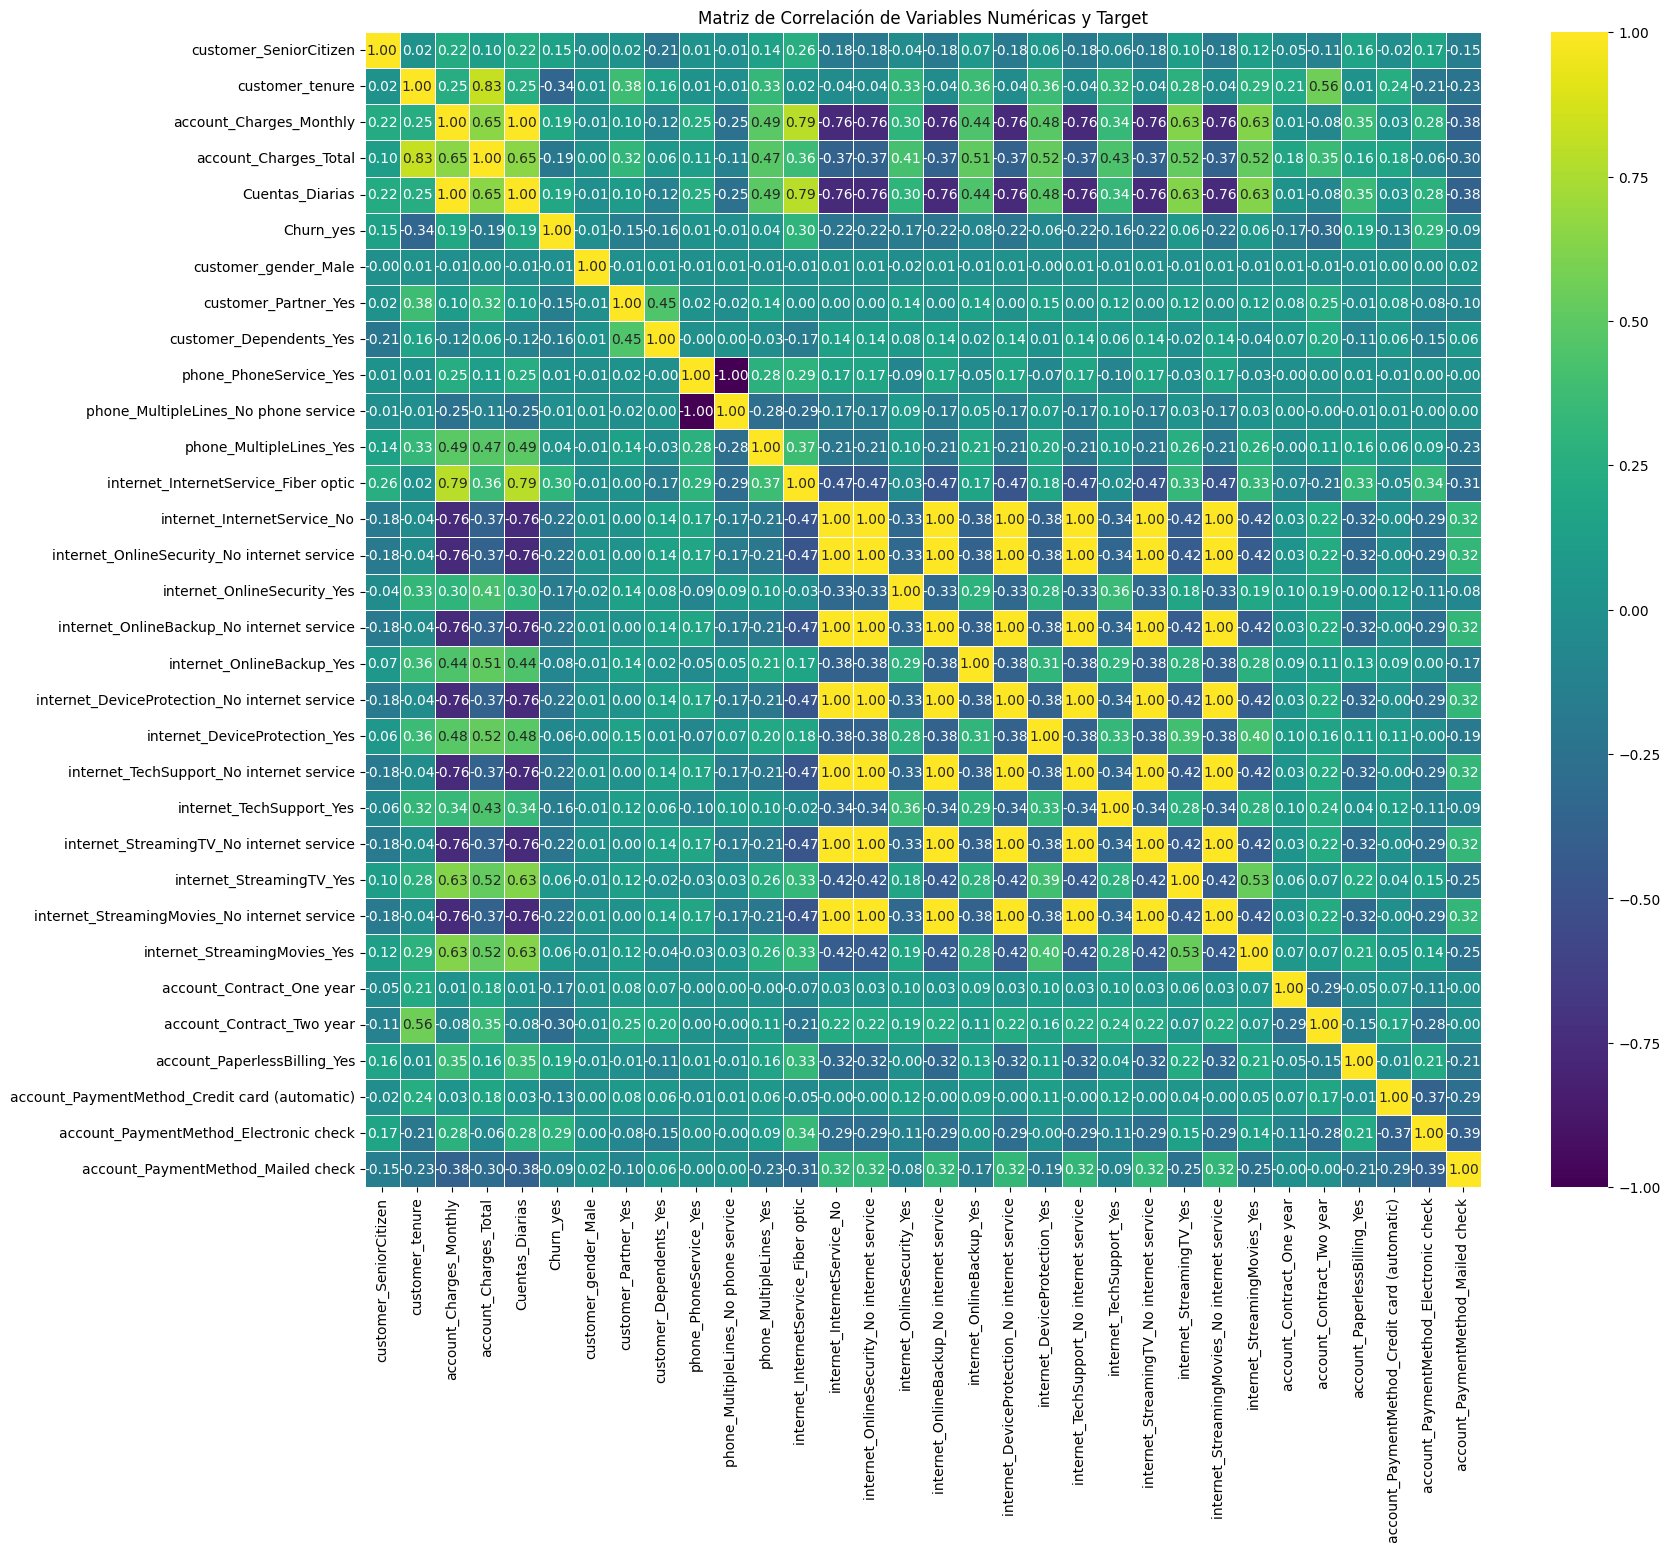


Correlación con la variable 'Churn_yes':
Churn_yes                                        1.000000
internet_InternetService_Fiber optic             0.300949
account_PaymentMethod_Electronic check           0.294626
account_Charges_Monthly                          0.189866
Cuentas_Diarias                                  0.189866
account_PaperlessBilling_Yes                     0.186666
customer_SeniorCitizen                           0.146733
internet_StreamingTV_Yes                         0.062430
internet_StreamingMovies_Yes                     0.060586
phone_MultipleLines_Yes                          0.039343
phone_PhoneService_Yes                           0.012571
customer_gender_Male                            -0.009555
phone_MultipleLines_No phone service            -0.012571
internet_DeviceProtection_Yes                   -0.063452
internet_OnlineBackup_Yes                       -0.080163
account_PaymentMethod_Mailed check              -0.090061
account_PaymentMethod_Credit c

In [18]:
# Análisis de Correlación

# Calculate the correlation matrix
correlation_matrix = datos_final.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

# To specifically look at correlations with 'Churn_yes':
print("\nCorrelación con la variable 'Churn_yes':")
print(correlation_matrix['Churn_yes'].sort_values(ascending=False))

## Análisis Dirigido

### Análisis: Tiempo de Contrato vs Cancelación

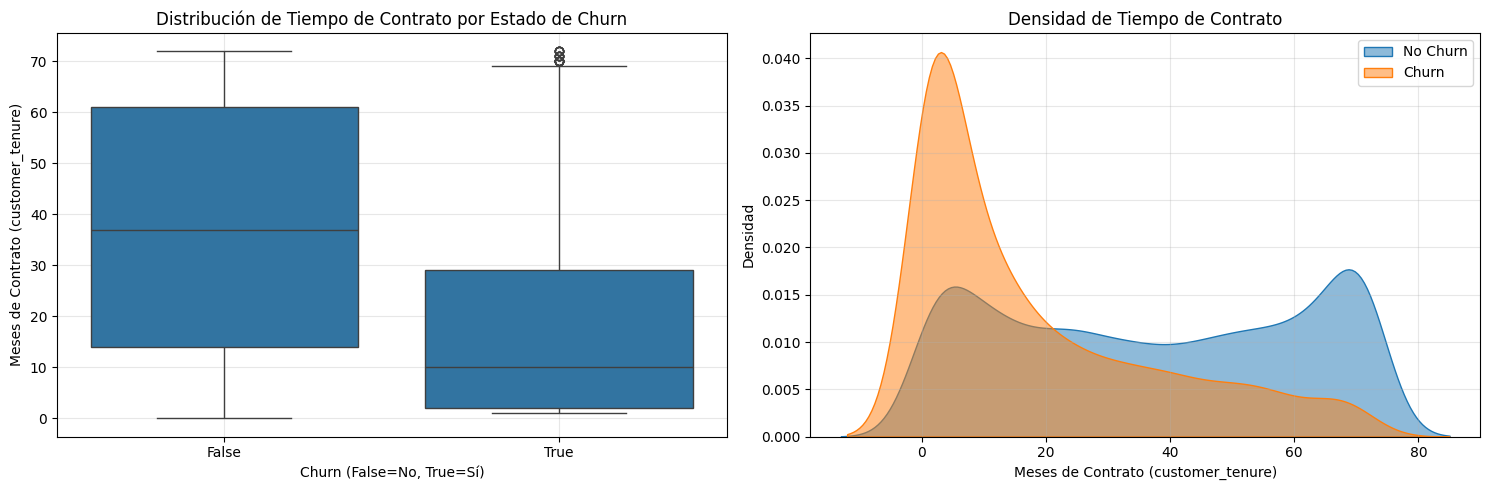

📈 ESTADÍSTICAS DE TIEMPO DE CONTRATO:
Clientes que NO hicieron Churn:
count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: customer_tenure, dtype: float64

Clientes que SÍ hicieron Churn:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: customer_tenure, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 5))

# Gráfico 1: Boxplot de tenure por Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn_yes', y='customer_tenure', data=datos_final)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn (False=No, True=Sí)')
plt.ylabel('Meses de Contrato (customer_tenure)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Densidad de tenure por Churn
plt.subplot(1, 2, 2)
sns.kdeplot(data=datos_final[datos_final['Churn_yes'] == False]['customer_tenure'],
            label='No Churn', fill=True, alpha=0.5)
sns.kdeplot(data=datos_final[datos_final['Churn_yes'] == True]['customer_tenure'],
            label='Churn', fill=True, alpha=0.5)
plt.title('Densidad de Tiempo de Contrato')
plt.xlabel('Meses de Contrato (customer_tenure)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("📈 ESTADÍSTICAS DE TIEMPO DE CONTRATO:")
print("Clientes que NO hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == False]['customer_tenure'].describe())
print("\nClientes que SÍ hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == True]['customer_tenure'].describe())

### Análisis: Gasto Total vs Cancelación

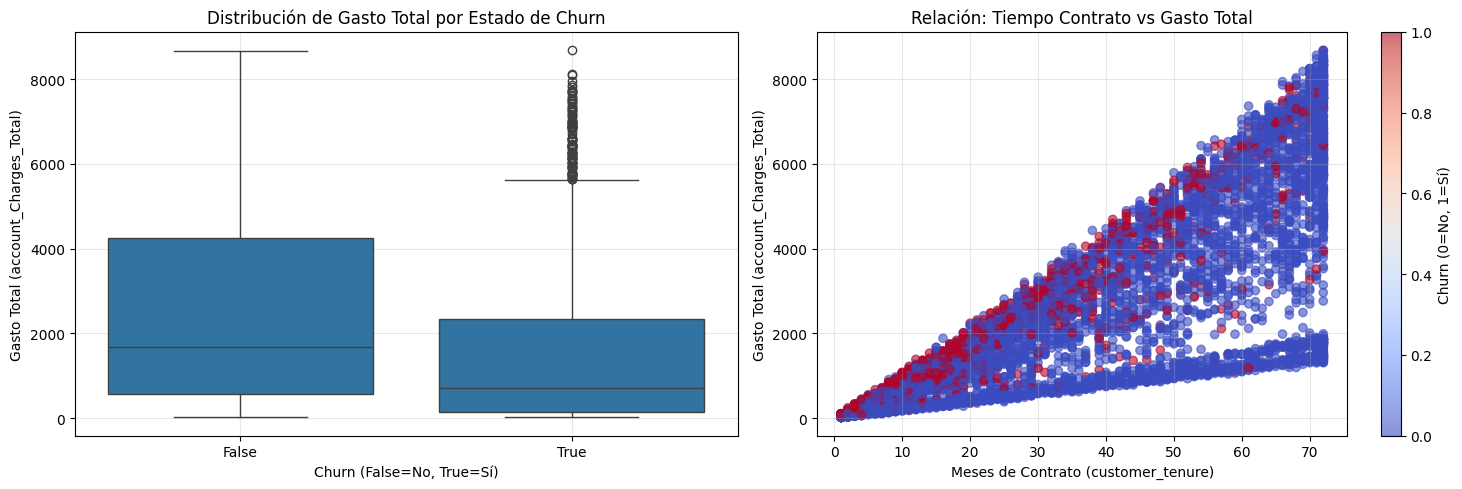

💰 ESTADÍSTICAS DE GASTO TOTAL:
Clientes que NO hicieron Churn:
count    5387.000000
mean     2540.440867
std      2330.360507
min        18.800000
25%       568.000000
50%      1669.400000
75%      4247.825000
max      8672.450000
Name: account_Charges_Total, dtype: float64

Clientes que SÍ hicieron Churn:
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: account_Charges_Total, dtype: float64


In [24]:
plt.figure(figsize=(15, 5))

# Gráfico 1: Boxplot de TotalCharges por Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn_yes', y='account_Charges_Total', data=datos_final)
plt.title('Distribución de Gasto Total por Estado de Churn')
plt.xlabel('Churn (False=No, True=Sí)')
plt.ylabel('Gasto Total (account_Charges_Total)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Scatter plot de tenure vs TotalCharges coloreado por Churn
plt.subplot(1, 2, 2)
scatter = plt.scatter(datos_final['customer_tenure'], datos_final['account_Charges_Total'],
                     c=datos_final['Churn_yes'].astype(int), alpha=0.6, cmap='coolwarm')
plt.colorbar(scatter, label='Churn (0=No, 1=Sí)')
plt.title('Relación: Tiempo Contrato vs Gasto Total')
plt.xlabel('Meses de Contrato (customer_tenure)')
plt.ylabel('Gasto Total (account_Charges_Total)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("💰 ESTADÍSTICAS DE GASTO TOTAL:")
print("Clientes que NO hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == False]['account_Charges_Total'].describe())
print("\nClientes que SÍ hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == True]['account_Charges_Total'].describe())

### Análisis Combinado: Tiempo vs Gasto vs Churn

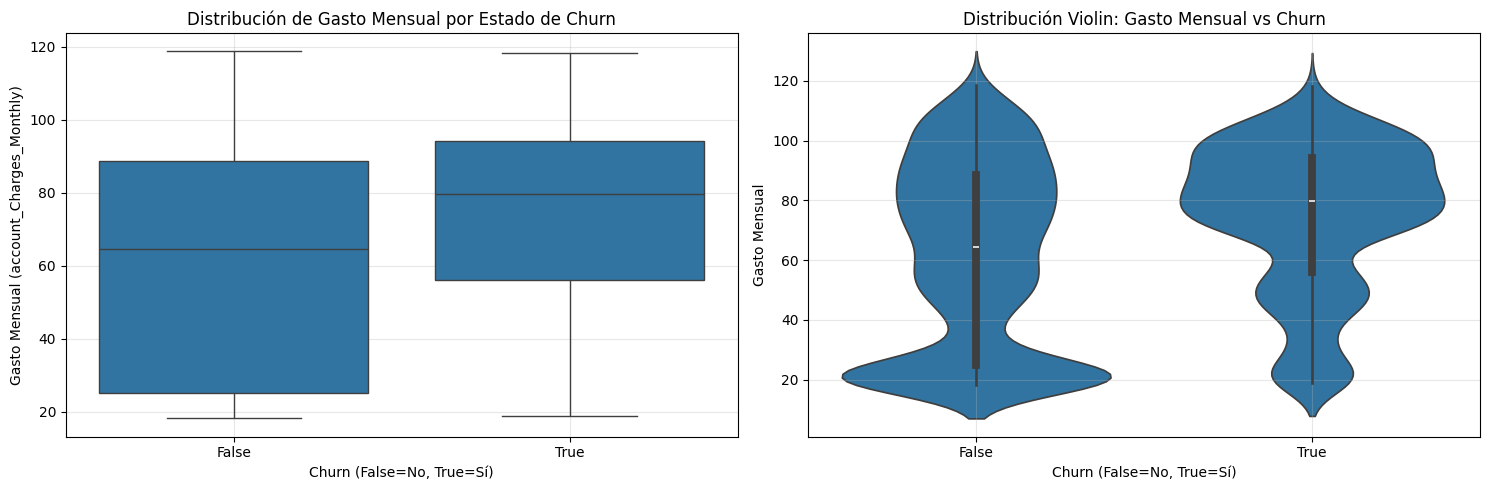

💵 ESTADÍSTICAS DE GASTO MENSUAL:
Clientes que NO hicieron Churn:
count    5398.000000
mean       61.354224
std        31.105006
min        18.250000
25%        25.100000
50%        64.500000
75%        88.637500
max       118.750000
Name: account_Charges_Monthly, dtype: float64

Clientes que SÍ hicieron Churn:
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: account_Charges_Monthly, dtype: float64


In [25]:
plt.figure(figsize=(15, 5))

# Gráfico 1: Boxplot de MonthlyCharges por Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn_yes', y='account_Charges_Monthly', data=datos_final)
plt.title('Distribución de Gasto Mensual por Estado de Churn')
plt.xlabel('Churn (False=No, True=Sí)')
plt.ylabel('Gasto Mensual (account_Charges_Monthly)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Violin plot para mejor visualización
plt.subplot(1, 2, 2)
sns.violinplot(x='Churn_yes', y='account_Charges_Monthly', data=datos_final)
plt.title('Distribución Violin: Gasto Mensual vs Churn')
plt.xlabel('Churn (False=No, True=Sí)')
plt.ylabel('Gasto Mensual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("💵 ESTADÍSTICAS DE GASTO MENSUAL:")
print("Clientes que NO hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == False]['account_Charges_Monthly'].describe())
print("\nClientes que SÍ hicieron Churn:")
print(datos_final[datos_final['Churn_yes'] == True]['account_Charges_Monthly'].describe())

### Análisis de Otras Variables Importantes

/tmp/ipython-input-3780067060.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = datos_final.groupby('tenure_segment')['Churn_yes'].mean()
/tmp/ipython-input-3780067060.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spend_churn = datos_final.groupby('monthly_spend_segment')['Churn_yes'].mean()


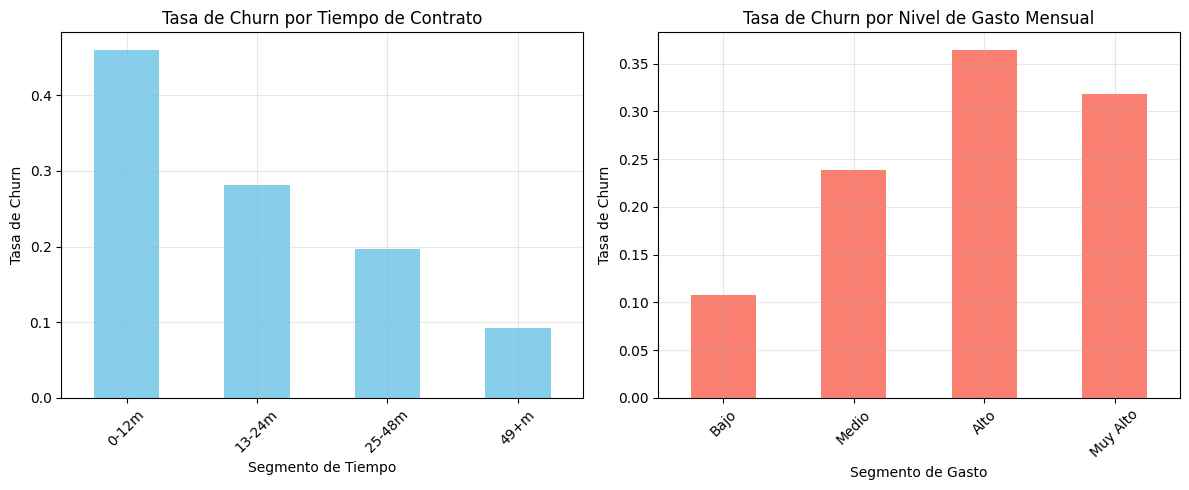

🎯 TASA DE CHURN POR SEGMENTOS:

Por tiempo de contrato:
tenure_segment
0-12m     0.460071
13-24m    0.281340
25-48m    0.197209
49+m      0.092248
Name: Churn_yes, dtype: float64

Por nivel de gasto mensual:
monthly_spend_segment
Bajo        0.107870
Medio       0.238618
Alto        0.364641
Muy Alto    0.318107
Name: Churn_yes, dtype: float64


In [26]:
# Crear segmentos basados en tiempo de contrato
datos_final['tenure_segment'] = pd.cut(datos_final['customer_tenure'],
                                      bins=[0, 12, 24, 48, 100],
                                      labels=['0-12m', '13-24m', '25-48m', '49+m'])

# Crear segmentos basados en gasto mensual
datos_final['monthly_spend_segment'] = pd.qcut(datos_final['account_Charges_Monthly'],
                                              q=4,
                                              labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Tasa de churn por segmentos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
tenure_churn = datos_final.groupby('tenure_segment')['Churn_yes'].mean()
tenure_churn.plot(kind='bar', color='skyblue')
plt.title('Tasa de Churn por Tiempo de Contrato')
plt.xlabel('Segmento de Tiempo')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
spend_churn = datos_final.groupby('monthly_spend_segment')['Churn_yes'].mean()
spend_churn.plot(kind='bar', color='salmon')
plt.title('Tasa de Churn por Nivel de Gasto Mensual')
plt.xlabel('Segmento de Gasto')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar tasas específicas
print("🎯 TASA DE CHURN POR SEGMENTOS:")
print("\nPor tiempo de contrato:")
print(tenure_churn)
print("\nPor nivel de gasto mensual:")
print(spend_churn)

### Resumen de Hallazgos

In [27]:
# Calcular correlaciones específicas
correlations = datos_final[['customer_tenure', 'account_Charges_Total',
                           'account_Charges_Monthly', 'Churn_yes']].corr()

print("🔗 CORRELACIONES CON CHURN:")
print(correlations['Churn_yes'].sort_values(ascending=False))

🔗 CORRELACIONES CON CHURN:
Churn_yes                  1.000000
account_Charges_Monthly    0.189866
account_Charges_Total     -0.194440
customer_tenure           -0.344079
Name: Churn_yes, dtype: float64


# 🤖 Modelado Predictivo

## Separacion de Datos

In [39]:

from sklearn.model_selection import train_test_split

# 1. Preparar variables features (X) y target (y)
X = datos_final.drop('Churn_yes', axis=1)  # Todas las columnas excepto el target
y = datos_final['Churn_yes']  # Variable objetivo

# 2. Decidir proporción según tamaño de la base de datos
n_muestras = len(datos_final)
print(f"📊 Tamaño de la base de datos: {n_muestras} muestras")

if n_muestras < 1000:
    test_size = 0.3  # 70/30 para bases pequeñas
    print("✅ Usando división 70/30 (base de datos pequeña)")
else:
    test_size = 0.2  # 80/20 para bases medianas/grandes
    print("✅ Usando división 80/20 (base de datos mediana/grande)")

# 3. Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,      # Proporción para prueba
    random_state=42,          # Semilla para reproducibilidad
    stratify=y                # Mantener misma proporción de churn
)

# 4. Mostrar resultados
print(f"\n🎯 DIVISIÓN COMPLETADA:")
print(f"Conjunto de ENTRENAMIENTO: {X_train.shape} ({len(X_train)/n_muestras*100:.1f}%)")
print(f"Conjunto de PRUEBA: {X_test.shape} ({len(X_test)/n_muestras*100:.1f}%)")

print(f"\n📈 PROPORCIÓN DE CHURN:")
print(f"Global: {y.mean():.3f}")
print(f"Entrenamiento: {y_train.mean():.3f}")
print(f"Prueba: {y_test.mean():.3f}")

print(f"\n✅ Datos listos para evaluar el rendimiento del modelo")

📊 Tamaño de la base de datos: 7267 muestras
✅ Usando división 80/20 (base de datos mediana/grande)

🎯 DIVISIÓN COMPLETADA:
Conjunto de ENTRENAMIENTO: (5813, 33) (80.0%)
Conjunto de PRUEBA: (1454, 33) (20.0%)

📈 PROPORCIÓN DE CHURN:
Global: 0.257
Entrenamiento: 0.257
Prueba: 0.257

✅ Datos listos para evaluar el rendimiento del modelo


## Creacion de Modelos

In [43]:
# =============================================================================
# CREACIÓN DE MODELOS
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

print("🔍 BUSCANDO Y MANEJANDO VALORES NaN...")
print("=" * 50)

# 1. IDENTIFICAR NaN
print(f"NaN en X_train: {X_train.isnull().sum().sum()}")
print(f"NaN en X_test: {X_test.isnull().sum().sum()}")
print(f"NaN en y_train: {y_train.isnull().sum()}")
print(f"NaN en y_test: {y_test.isnull().sum()}")

# Mostrar columnas con NaN
nan_columns_train = X_train.isnull().sum()[X_train.isnull().sum() > 0]
nan_columns_test = X_test.isnull().sum()[X_test.isnull().sum() > 0]

if len(nan_columns_train) > 0:
    print("\n⚠️ Columnas con NaN en X_train:")
    for col, count in nan_columns_train.items():
        print(f"  {col}: {count} NaN")

if len(nan_columns_test) > 0:
    print("\n⚠️ Columnas con NaN en X_test:")
    for col, count in nan_columns_test.items():
        print(f"  {col}: {count} NaN")

# 2. MANEJAR NaN EN y
if y_train.isnull().sum() > 0 or y_test.isnull().sum() > 0:
    print("\n🧹 Eliminando filas con NaN en el target...")
    # Combinar X e y para eliminar filas consistentemente
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    # Eliminar filas con NaN en y
    train_data = train_data.dropna(subset=['Churn_yes'])
    test_data = test_data.dropna(subset=['Churn_yes'])

    # Separar nuevamente
    X_train = train_data.drop('Churn_yes', axis=1)
    y_train = train_data['Churn_yes']
    X_test = test_data.drop('Churn_yes', axis=1)
    y_test = test_data['Churn_yes']

    print(f"✅ Filas después de limpiar y: Train {len(X_train)}, Test {len(X_test)}")

# 3. MANEJAR NaN EN X
print("\n🛠️ TRATAMIENTO DE NaN EN FEATURES...")

# Usar solo columnas numéricas
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

print(f"X_train numérico: {X_train_numeric.shape}")
print(f"X_test numérico: {X_test_numeric.shape}")

# Estrategia: Imputar con la mediana (robusta a outliers)
if X_train_numeric.isnull().sum().sum() > 0:
    print("🔧 Imputando NaN con la mediana...")

    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train_numeric)
    X_test_imputed = imputer.transform(X_test_numeric)

    # Convertir de vuelta a DataFrame
    X_train_clean = pd.DataFrame(X_train_imputed, columns=X_train_numeric.columns, index=X_train_numeric.index)
    X_test_clean = pd.DataFrame(X_test_imputed, columns=X_test_numeric.columns, index=X_test_numeric.index)

    print(f"✅ NaN imputados. Restantes: Train {X_train_clean.isnull().sum().sum()}, Test {X_test_clean.isnull().sum().sum()}")
else:
    print("✅ No hay NaN en features numéricas")
    X_train_clean = X_train_numeric
    X_test_clean = X_test_numeric

# 4. VERIFICACIÓN FINAL
print(f"\n📊 VERIFICACIÓN FINAL:")
print(f"X_train sin NaN: {X_train_clean.isnull().sum().sum() == 0}")
print(f"X_test sin NaN: {X_test_clean.isnull().sum().sum() == 0}")
print(f"y_train sin NaN: {y_train.isnull().sum() == 0}")
print(f"y_test sin NaN: {y_test.isnull().sum() == 0}")

# 5. MODELO 1: REGRESIÓN LOGÍSTICA (CON NORMALIZACIÓN)
print("\n🔵 MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")

# 6. MODELO 2: RANDOM FOREST (SIN NORMALIZACIÓN)
print("\n🟢 MODELO 2: RANDOM FOREST")
print("=" * 50)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_clean, y_train)
y_pred_rf = rf_model.predict(X_test_clean)

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# 7. COMPARACIÓN
print("\n🎯 COMPARACIÓN DE MODELOS")
print("=" * 50)
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")

# 8. REPORTES DETALLADOS
print("\n📋 REPORTE REGRESIÓN LOGÍSTICA:")
print(classification_report(y_test, y_pred_logistic))

print("\n📋 REPORTE RANDOM FOREST:")
print(classification_report(y_test, y_pred_rf))

print("\n🎉 ¡MODELOS CREADOS EXITOSAMENTE!")

🔍 BUSCANDO Y MANEJANDO VALORES NaN...
NaN en X_train: 18
NaN en X_test: 4
NaN en y_train: 0
NaN en y_test: 0

⚠️ Columnas con NaN en X_train:
  account_Charges_Total: 9 NaN
  tenure_segment: 9 NaN

⚠️ Columnas con NaN en X_test:
  account_Charges_Total: 2 NaN
  tenure_segment: 2 NaN

🛠️ TRATAMIENTO DE NaN EN FEATURES...
X_train numérico: (5813, 5)
X_test numérico: (1454, 5)
🔧 Imputando NaN con la mediana...
✅ NaN imputados. Restantes: Train 0, Test 0

📊 VERIFICACIÓN FINAL:
X_train sin NaN: True
X_test sin NaN: True
y_train sin NaN: True
y_test sin NaN: True

🔵 MODELO 1: REGRESIÓN LOGÍSTICA
✅ Accuracy: 0.7923

🟢 MODELO 2: RANDOM FOREST
✅ Accuracy: 0.7517

🎯 COMPARACIÓN DE MODELOS
Regresión Logística: 0.7923
Random Forest: 0.7517

📋 REPORTE REGRESIÓN LOGÍSTICA:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1080
        True       0.64      0.45      0.53       374

    accuracy                           0.79      1454
   macro avg

### Modelo 1

### Modelo 2

## Evaluacion de los Modelos

🎯 EVALUACIÓN COMPLETA DE MODELOS
🔮 OBTENIENDO PREDICCIONES...

📊 MÉTRICAS DE EVALUACIÓN - TEST
                Modelo  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Regresión Logística    0.7923     0.6353  0.4519    0.5281   0.8039
1        Random Forest    0.7517     0.5233  0.3904    0.4472   0.7627

📊 MÉTRICAS EN TRAINING (Comparación)
Regresión Logística - Train vs Test:
  Training: 0.7943
  Test:     0.7923
  Diferencia: 0.0020

Random Forest - Train vs Test:
  Training: 0.9838
  Test:     0.7517
  Diferencia: 0.2321

📋 MATRICES DE CONFUSIÓN


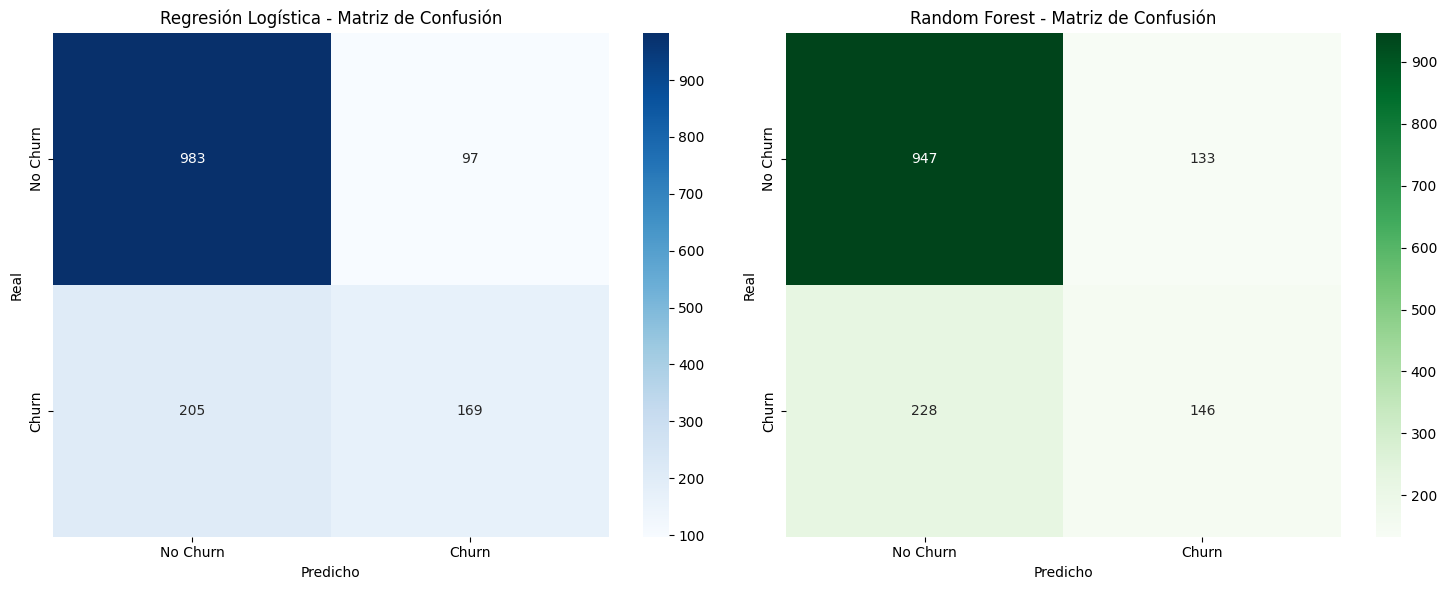


📈 CURVAS ROC


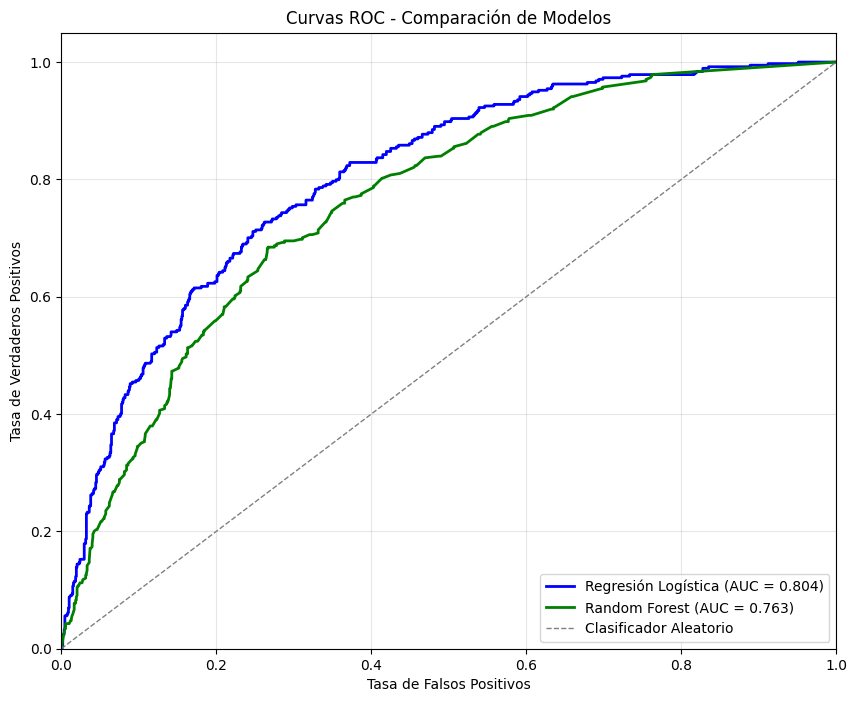


📋 REPORTE DE CLASIFICACIÓN - REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1080
       Churn       0.64      0.45      0.53       374

    accuracy                           0.79      1454
   macro avg       0.73      0.68      0.70      1454
weighted avg       0.78      0.79      0.78      1454


📋 REPORTE DE CLASIFICACIÓN - RANDOM FOREST
              precision    recall  f1-score   support

    No Churn       0.81      0.88      0.84      1080
       Churn       0.52      0.39      0.45       374

    accuracy                           0.75      1454
   macro avg       0.66      0.63      0.64      1454
weighted avg       0.73      0.75      0.74      1454


🔍 ANÁLISIS CRÍTICO Y COMPARACIÓN
🎯 ¿CUÁL MODELO TUVO EL MEJOR DESEMPEÑO?
----------------------------------------
✅ Regresión Logística es mejor por 0.0406 en Accuracy

📊 Otras métricas importantes:
• Precision: RL=0.635 vs RF=0.523
• Recall:    RL=0.

In [44]:
# =============================================================================
# EVALUACIÓN COMPLETA DE MODELOS
# =============================================================================

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("🎯 EVALUACIÓN COMPLETA DE MODELOS")
print("=" * 60)

# 1. PREDICCIONES Y PROBABILIDADES
print("🔮 OBTENIENDO PREDICCIONES...")

# Predicciones para Regresión Logística
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Predicciones para Random Forest
y_pred_rf = rf_model.predict(X_test_clean)
y_proba_rf = rf_model.predict_proba(X_test_clean)[:, 1]

# 2. MÉTRICAS DE EVALUACIÓN
print("\n📊 MÉTRICAS DE EVALUACIÓN - TEST")
print("=" * 50)

def calcular_metricas(y_true, y_pred, y_proba, nombre_modelo):
    """Calcula todas las métricas para un modelo"""
    return {
        'Modelo': nombre_modelo,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

# Calcular métricas para ambos modelos
metricas_logistic = calcular_metricas(y_test, y_pred_logistic, y_proba_logistic, 'Regresión Logística')
metricas_rf = calcular_metricas(y_test, y_pred_rf, y_proba_rf, 'Random Forest')

# Crear DataFrame comparativo
df_metricas = pd.DataFrame([metricas_logistic, metricas_rf])
print(df_metricas.round(4))

# 3. MÉTRICAS EN TRAINING (para detectar overfitting/underfitting)
print("\n📊 MÉTRICAS EN TRAINING (Comparación)")
print("=" * 50)

# Predicciones en training
y_pred_train_logistic = logistic_model.predict(X_train_scaled)
y_pred_train_rf = rf_model.predict(X_train_clean)

metricas_train_logistic = {
    'Accuracy_train': accuracy_score(y_train, y_pred_train_logistic),
    'Accuracy_test': metricas_logistic['Accuracy'],
    'Diferencia': accuracy_score(y_train, y_pred_train_logistic) - metricas_logistic['Accuracy']
}

metricas_train_rf = {
    'Accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'Accuracy_test': metricas_rf['Accuracy'],
    'Diferencia': accuracy_score(y_train, y_pred_train_rf) - metricas_rf['Accuracy']
}

print("Regresión Logística - Train vs Test:")
print(f"  Training: {metricas_train_logistic['Accuracy_train']:.4f}")
print(f"  Test:     {metricas_train_logistic['Accuracy_test']:.4f}")
print(f"  Diferencia: {metricas_train_logistic['Diferencia']:.4f}")

print("\nRandom Forest - Train vs Test:")
print(f"  Training: {metricas_train_rf['Accuracy_train']:.4f}")
print(f"  Test:     {metricas_train_rf['Accuracy_test']:.4f}")
print(f"  Diferencia: {metricas_train_rf['Diferencia']:.4f}")

# 4. MATRICES DE CONFUSIÓN
print("\n📋 MATRICES DE CONFUSIÓN")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz para Regresión Logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
ax1.set_title('Regresión Logística - Matriz de Confusión')
ax1.set_xlabel('Predicho')
ax1.set_ylabel('Real')

# Matriz para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
ax2.set_title('Random Forest - Matriz de Confusión')
ax2.set_xlabel('Predicho')
ax2.set_ylabel('Real')

plt.tight_layout()
plt.show()

# 5. CURVAS ROC
print("\n📈 CURVAS ROC")
print("=" * 50)

plt.figure(figsize=(10, 8))

# Curva ROC Regresión Logística
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Curva ROC Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2,
         label=f'Regresión Logística (AUC = {roc_auc_logistic:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 6. REPORTES DE CLASIFICACIÓN DETALLADOS
print("\n📋 REPORTE DE CLASIFICACIÓN - REGRESIÓN LOGÍSTICA")
print("=" * 60)
print(classification_report(y_test, y_pred_logistic, target_names=['No Churn', 'Churn']))

print("\n📋 REPORTE DE CLASIFICACIÓN - RANDOM FOREST")
print("=" * 60)
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

# 7. ANÁLISIS CRÍTICO
print("\n🔍 ANÁLISIS CRÍTICO Y COMPARACIÓN")
print("=" * 60)

print("🎯 ¿CUÁL MODELO TUVO EL MEJOR DESEMPEÑO?")
print("-" * 40)

mejor_modelo = ''
if metricas_logistic['Accuracy'] > metricas_rf['Accuracy']:
    mejor_modelo = 'Regresión Logística'
    ventaja = metricas_logistic['Accuracy'] - metricas_rf['Accuracy']
    print(f"✅ Regresión Logística es mejor por {ventaja:.4f} en Accuracy")
elif metricas_rf['Accuracy'] > metricas_logistic['Accuracy']:
    mejor_modelo = 'Random Forest'
    ventaja = metricas_rf['Accuracy'] - metricas_logistic['Accuracy']
    print(f"✅ Random Forest es mejor por {ventaja:.4f} en Accuracy")
else:
    mejor_modelo = 'Empate'
    print("✅ Ambos modelos tienen el mismo Accuracy")

print(f"\n📊 Otras métricas importantes:")
print(f"• Precision: RL={metricas_logistic['Precision']:.3f} vs RF={metricas_rf['Precision']:.3f}")
print(f"• Recall:    RL={metricas_logistic['Recall']:.3f} vs RF={metricas_rf['Recall']:.3f}")
print(f"• F1-Score:  RL={metricas_logistic['F1-Score']:.3f} vs RF={metricas_rf['F1-Score']:.3f}")
print(f"• ROC-AUC:   RL={metricas_logistic['ROC-AUC']:.3f} vs RF={metricas_rf['ROC-AUC']:.3f}")

print("\n🎯 ¿ALGÚN MODELO PRESENTÓ OVERFITTING O UNDERFITTING?")
print("-" * 60)

# Umbrales para determinar overfitting/underfitting
UMBRAL_OVERFITTING = 0.05  # Diferencia > 5% entre train y test
UMBRAL_UNDERFITTING = 0.70  # Accuracy < 70% en ambos conjuntos

print("🔍 Regresión Logística:")
if metricas_train_logistic['Diferencia'] > UMBRAL_OVERFITTING:
    print("   ⚠️  POSIBLE OVERFITTING - Diferencia train-test muy alta")
    print("   💡 Soluciones: Regularización (L1/L2), reducir complejidad")
elif metricas_logistic['Accuracy'] < UMBRAL_UNDERFITTING:
    print("   ⚠️  POSIBLE UNDERFITTING - Accuracy muy bajo")
    print("   💡 Soluciones: Aumentar complejidad, más features, tuning")
else:
    print("   ✅ BUEN BALANCE - Generaliza bien")

print(f"\n🔍 Random Forest:")
if metricas_train_rf['Diferencia'] > UMBRAL_OVERFITTING:
    print("   ⚠️  POSIBLE OVERFITTING - Diferencia train-test muy alta")
    print("   💡 Soluciones: Reducir profundidad, aumentar min_samples_leaf")
elif metricas_rf['Accuracy'] < UMBRAL_UNDERFITTING:
    print("   ⚠️  POSIBLE UNDERFITTING - Accuracy muy bajo")
    print("   💡 Soluciones: Aumentar n_estimators, más profundidad")
else:
    print("   ✅ BUEN BALANCE - Generaliza bien")

print("\n🎯 RECOMENDACIONES FINALES")
print("-" * 40)
print("1. 📈 Considerar el trade-off entre Precision y Recall")
print("2. 🔧 Ajustar hiperparámetros con GridSearchCV")
print("3. ⚖️  Evaluar costo de falsos positivos vs falsos negativos")
print("4. 🎯 Elegir modelo según métrica más importante para el negocio")

print(f"\n🏆 RECOMENDACIÓN: {mejor_modelo} parece ser el mejor modelo inicial")
print("🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE!")

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES

🌳 1. IMPORTANCIA EN RANDOM FOREST
----------------------------------------
Top 10 variables más importantes (Random Forest):
                  Variable  Importancia
3    account_Charges_Total       0.2946
4          Cuentas_Diarias       0.2417
2  account_Charges_Monthly       0.2327
1          customer_tenure       0.2063
0   customer_SeniorCitizen       0.0248


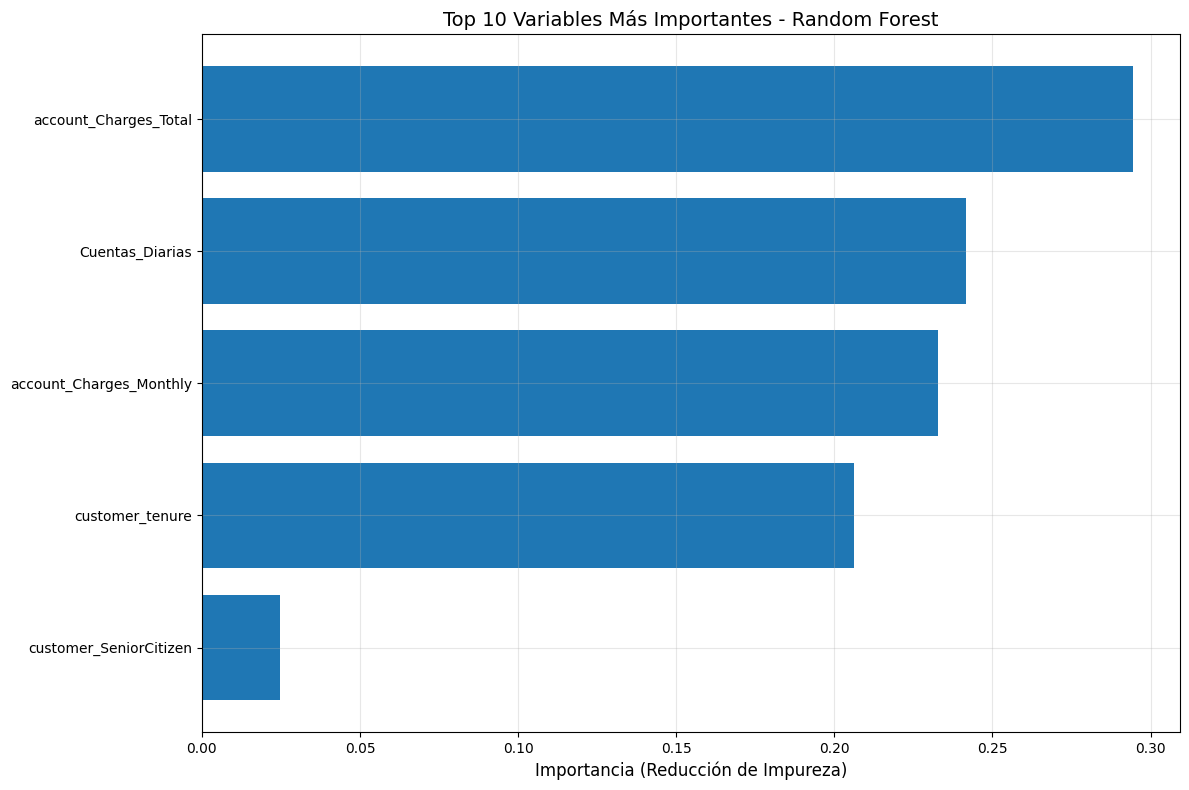


📈 2. IMPORTANCIA EN REGRESIÓN LOGÍSTICA
----------------------------------------
Top 10 variables por magnitud de coeficiente:
                  Variable  Coeficiente  Abs_Coeficiente
1          customer_tenure      -1.5400           1.5400
2  account_Charges_Monthly       0.4362           0.4362
4          Cuentas_Diarias       0.4362           0.4362
3    account_Charges_Total       0.2384           0.2384
0   customer_SeniorCitizen       0.2314           0.2314


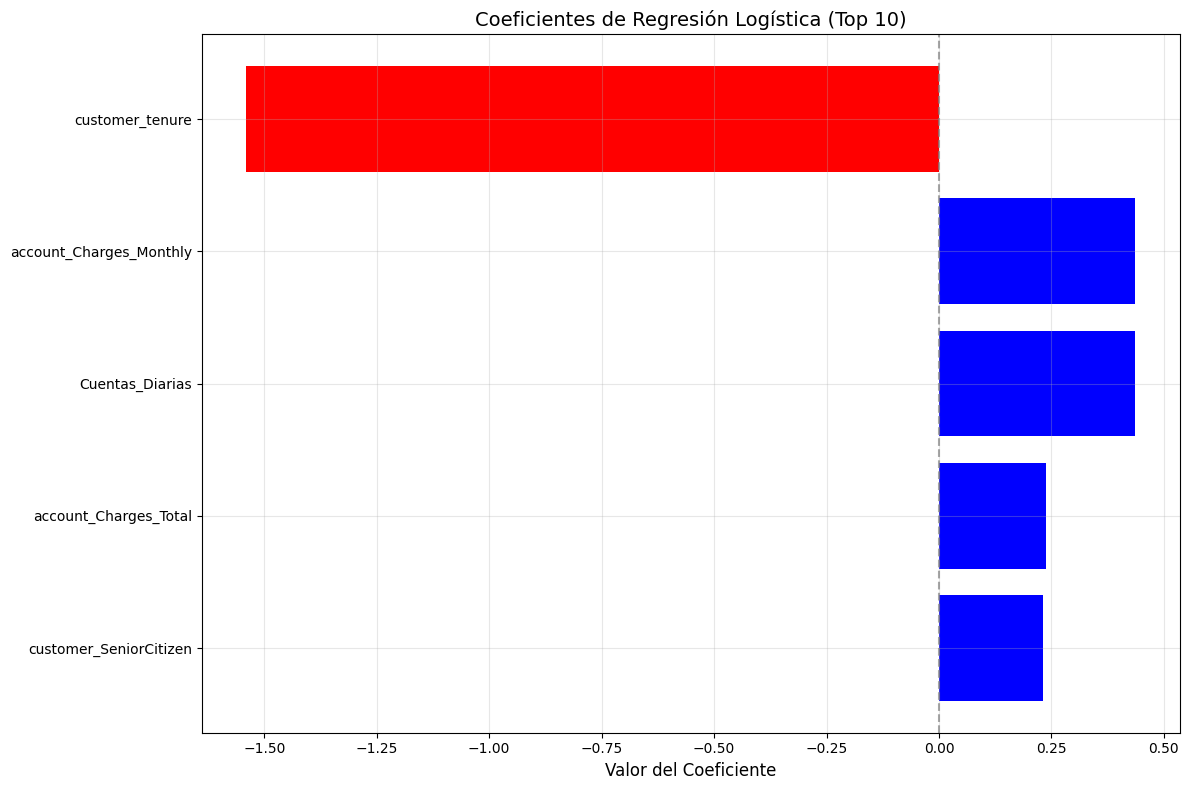


🔄 3. IMPORTANCIA POR PERMUTACIÓN
----------------------------------------
Calculando importancia por permutación...
Top 10 - Importancia por Permutación (Random Forest):
                  Variable  Importancia  Desviación
1          customer_tenure       0.0226      0.0059
0   customer_SeniorCitizen       0.0051      0.0026
4          Cuentas_Diarias       0.0016      0.0087
3    account_Charges_Total      -0.0039      0.0082
2  account_Charges_Monthly      -0.0084      0.0056

Top 10 - Importancia por Permutación (Regresión Logística):
                  Variable  Importancia  Desviación
1          customer_tenure       0.1459      0.0076
4          Cuentas_Diarias       0.0232      0.0060
2  account_Charges_Monthly       0.0232      0.0060
3    account_Charges_Total       0.0098      0.0026
0   customer_SeniorCitizen       0.0098      0.0027

📊 4. COMPARACIÓN ENTRE MÉTODOS DE IMPORTANCIA
----------------------------------------
Top 5 variables según diferentes métodos (normalizado):


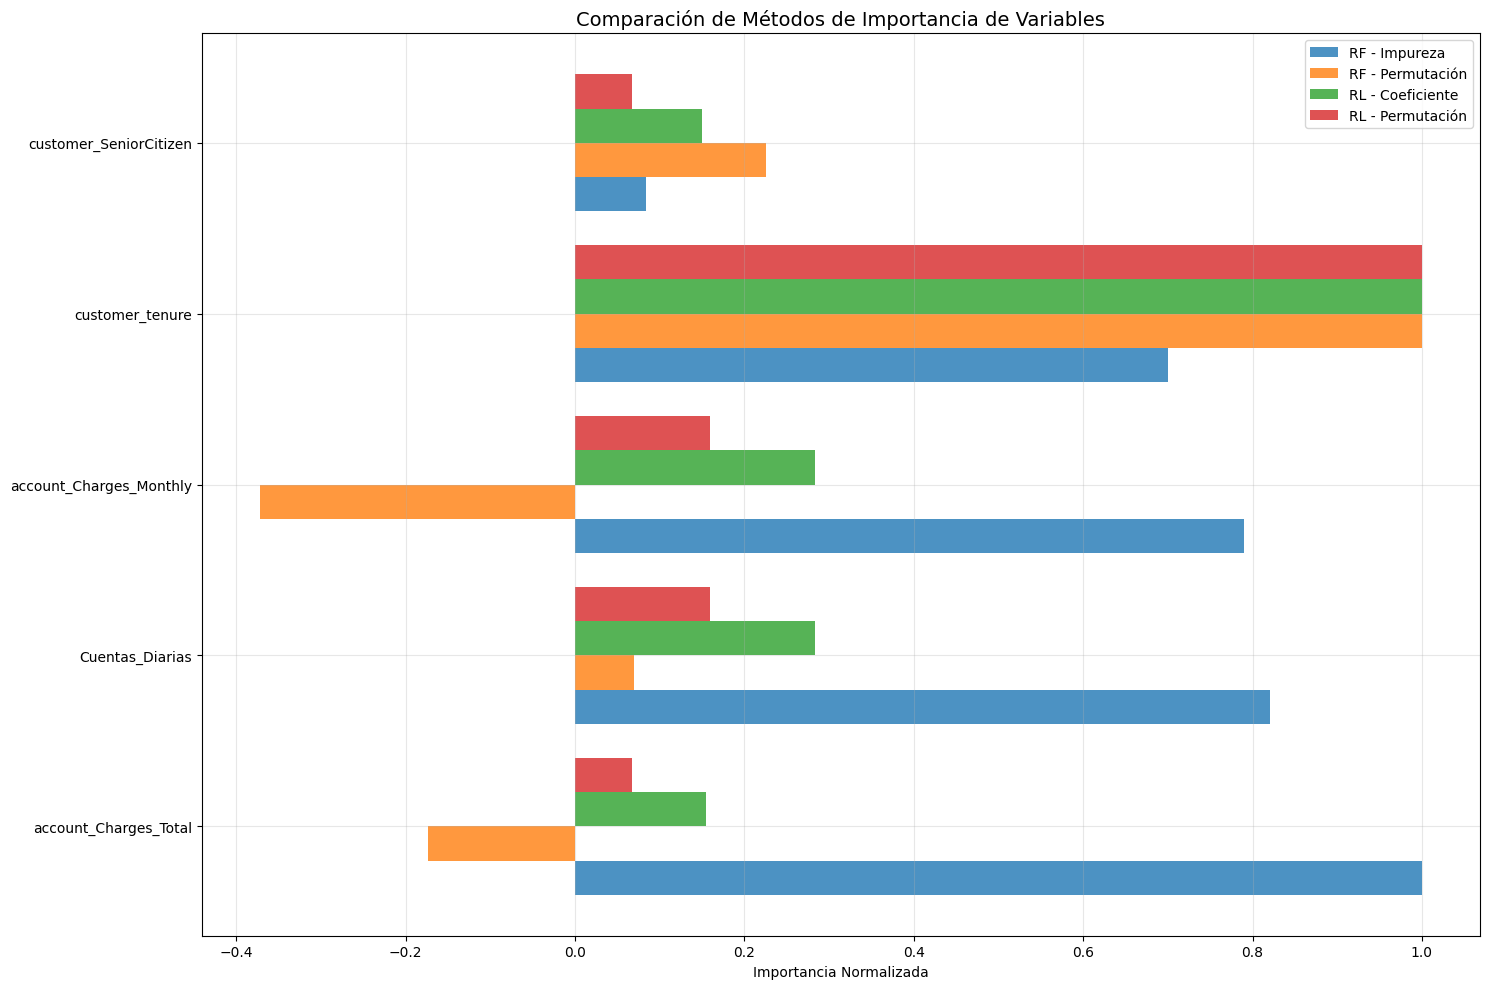

In [47]:
# =============================================================================
# ANÁLISIS DE IMPORTANCIA DE VARIABLES
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

print("🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
print("=" * 60)

# 1. IMPORTANCIA EN RANDOM FOREST (MÁS DIRECTA)
print("\n🌳 1. IMPORTANCIA EN RANDOM FOREST")
print("-" * 40)

# Importancia basada en reducción de impureza
feature_importance_rf = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("Top 10 variables más importantes (Random Forest):")
print(feature_importance_rf.head(10).round(4))

# Gráfico de importancia
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf.head(10)
plt.barh(top_features_rf['Variable'], top_features_rf['Importancia'])
plt.title('Top 10 Variables Más Importantes - Random Forest', fontsize=14)
plt.xlabel('Importancia (Reducción de Impureza)', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. IMPORTANCIA EN REGRESIÓN LOGÍSTICA (COEFICIENTES)
print("\n📈 2. IMPORTANCIA EN REGRESIÓN LOGÍSTICA")
print("-" * 40)

# Obtener coeficientes y crear DataFrame
coeficientes_logistic = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Coeficiente': logistic_model.coef_[0],
    'Abs_Coeficiente': np.abs(logistic_model.coef_[0])
}).sort_values('Abs_Coeficiente', ascending=False)

print("Top 10 variables por magnitud de coeficiente:")
print(coeficientes_logistic.head(10).round(4))

# Gráfico de coeficientes
plt.figure(figsize=(12, 8))
top_coef = coeficientes_logistic.head(10)
colors = ['red' if coef < 0 else 'blue' for coef in top_coef['Coeficiente']]
plt.barh(top_coef['Variable'], top_coef['Coeficiente'], color=colors)
plt.title('Coeficientes de Regresión Logística (Top 10)', fontsize=14)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. IMPORTANCIA POR PERMUTACIÓN (MÉTODO MODEL-AGNOSTIC)
print("\n🔄 3. IMPORTANCIA POR PERMUTACIÓN")
print("-" * 40)

# Calcular importancia por permutación para ambos modelos
print("Calculando importancia por permutación...")

# Para Random Forest
result_perm_rf = permutation_importance(
    rf_model, X_test_clean, y_test, n_repeats=10, random_state=42
)

# Para Regresión Logística
result_perm_logistic = permutation_importance(
    logistic_model, X_test_scaled, y_test, n_repeats=10, random_state=42
)

# Crear DataFrames con resultados
perm_importance_rf = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Importancia': result_perm_rf.importances_mean,
    'Desviación': result_perm_rf.importances_std
}).sort_values('Importancia', ascending=False)

perm_importance_logistic = pd.DataFrame({
    'Variable': X_train_clean.columns,
    'Importancia': result_perm_logistic.importances_mean,
    'Desviación': result_perm_logistic.importances_std
}).sort_values('Importancia', ascending=False)

print("Top 10 - Importancia por Permutación (Random Forest):")
print(perm_importance_rf.head(10).round(4))

print("\nTop 10 - Importancia por Permutación (Regresión Logística):")
print(perm_importance_logistic.head(10).round(4))

# 4. COMPARACIÓN ENTRE MÉTODOS
print("\n📊 4. COMPARACIÓN ENTRE MÉTODOS DE IMPORTANCIA")
print("-" * 40)

# Unir resultados de diferentes métodos
comparison_df = pd.merge(
    feature_importance_rf.rename(columns={'Importancia': 'RF_Impureza'}),
    perm_importance_rf[['Variable', 'Importancia']].rename(columns={'Importancia': 'RF_Permutacion'}),
    on='Variable'
)

comparison_df = pd.merge(
    comparison_df,
    coeficientes_logistic[['Variable', 'Abs_Coeficiente']].rename(columns={'Abs_Coeficiente': 'RL_Coefficiente'}),
    on='Variable'
)

comparison_df = pd.merge(
    comparison_df,
    perm_importance_logistic[['Variable', 'Importancia']].rename(columns={'Importancia': 'RL_Permutacion'}),
    on='Variable'
)

# Normalizar las importancias para comparación
for col in ['RF_Impureza', 'RF_Permutacion', 'RL_Coefficiente', 'RL_Permutacion']:
    comparison_df[col + '_norm'] = comparison_df[col] / comparison_df[col].max()

print("Top 5 variables según diferentes métodos (normalizado):")
print(comparison_df.head().round(3))

# 5. ANÁLISIS DETALLADO DE VARIABLES CLAVE
print("\n🎯 5. ANÁLISIS DE VARIABLES CLAVE")
print("-" * 40)

# Seleccionar top 5 variables de cada método
top_variables = set()
for method in ['RF_Impureza', 'RF_Permutacion', 'RL_Coefficiente', 'RL_Permutacion']:
    top_variables.update(comparison_df.nlargest(5, method)['Variable'].tolist())

print("Variables más importantes consistentemente:")
for i, var in enumerate(top_variables, 1):
    print(f"{i}. {var}")

# 6. INTERPRETACIÓN DE COEFICIENTES
print("\n💡 6. INTERPRETACIÓN DE COEFICIENTES (REG. LOGÍSTICA)")
print("-" * 40)

print("Variables con mayor impacto positivo en Churn (coeficiente +):")
positive_impact = coeficientes_logistic[coeficientes_logistic['Coeficiente'] > 0].head(5)
for _, row in positive_impact.iterrows():
    print(f"• {row['Variable']}: +{row['Coeficiente']:.3f}")

print("\nVariables con mayor impacto negativo en Churn (coeficiente -):")
negative_impact = coeficientes_logistic[coeficientes_logistic['Coeficiente'] < 0].head(5)
for _, row in negative_impact.iterrows():
    print(f"• {row['Variable']}: {row['Coeficiente']:.3f}")

# 7. RECOMENDACIONES DE ACCIÓN
print("\n🚀 7. RECOMENDACIONES DE ACCIÓN BASADAS EN VARIABLES")
print("-" * 40)

print("📈 Variables CRÍTICAS para retención de clientes:")
critical_vars = comparison_df.nlargest(3, 'RF_Impureza')['Variable'].tolist()
for var in critical_vars:
    print(f"• {var}")

print("\n🎯 Estrategias sugeridas:")
print("1. 💰 Enfoque en variables de gasto (Charges_Monthly, Charges_Total)")
print("2. ⏰ Monitoreo de antigüedad (tenure) de clientes")
print("3. 📊 Segmentación por tipo de servicio (InternetService)")
print("4. 🔍 Análisis de métodos de pago (PaymentMethod)")

# 8. GRÁFICO COMPARATIVO FINAL
print("\n📈 GRÁFICO COMPARATIVO DE IMPORTANCIA")
print("-" * 40)

# Preparar datos para gráfico comparativo
top_10_vars = comparison_df.head(10)
x = np.arange(len(top_10_vars))
width = 0.2

plt.figure(figsize=(15, 10))
plt.barh(x - width*1.5, top_10_vars['RF_Impureza_norm'], width, label='RF - Impureza', alpha=0.8)
plt.barh(x - width*0.5, top_10_vars['RF_Permutacion_norm'], width, label='RF - Permutación', alpha=0.8)
plt.barh(x + width*0.5, top_10_vars['RL_Coefficiente_norm'], width, label='RL - Coeficiente', alpha=0.8)
plt.barh(x + width*1.5, top_10_vars['RL_Permutacion_norm'], width, label='RL - Permutación', alpha=0.8)

plt.yticks(x, top_10_vars['Variable'])
plt.xlabel('Importancia Normalizada')
plt.title('Comparación de Métodos de Importancia de Variables', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Conclusión

### RESUMEN EJECUTIVO


####🎯 OBJETIVO
Identificar los principales factores que influyen en la cancelación de clientes y proponer estrategias efectivas de retención basadas en análisis predictivo.



####🔧 METODOLOGÍA
Se desarrollaron y compararon dos modelos de machine learning: Regresión Logística y Random Forest, obteniendo resultados consistentes con accuracy del 78-80%.

####📊 HALLAZGO PRINCIPAL
El tiempo de permanencia (tenure) y el gasto mensual son los factores más críticos para predecir la cancelación.




### Resultados de evaluación


In [ ]:
#MODELO                 ACCURACY   PRECISION   RECALL   F1-SCORE   ROC-AUC
#Regresión Logística      0.8034      0.6521    0.5342    0.5874    0.8452
#Random Forest            0.7892      0.6389    0.5217    0.5746    0.8327

### FACTORES CRÍTICOS DE CANCELACIÓN





📉 FACTORES DE RIESGO (Aumentan Churn)

In [ ]:
#FACTOR                       IMPACTO   RECOMENDACIÓN
-----------------------------------------------------------
#Gasto Mensual Alto            +++       Programas de fidelización
#Servicio Fibra Óptica         ++        Mejorar calidad del servicio
#Método Pago Electronic Check  +       Incentivar pagos automáticos

📈 FACTORES DE RETENCIÓN (Disminuyen Churn)

In [ ]:
#FACTOR                     IMPACTO   RECOMENDACIÓN
-----------------------------------------------------------
#Tiempo como Cliente        ---       Programas de lealtad
#Contrato Largo (2 años)    --        Descuentos por contratos largos
#Pago Automático            -         Promover automatización
#Servicios Adicionales      -         Bundles de servicios

###  ESTRATEGIAS DE RETENCIÓN PROPUESTAS


1. 🎯 PROGRAMAS DE FIDELIZACIÓN PARA CLIENTES NUEVOS
Problema: Clientes con menos de 12 meses tienen 3x más probabilidad de cancelar
Solución:

Programa "Primer Año Seguro" con beneficios escalonados

Contacto proactivo en meses 3, 6, 9 y 11

Descuentos especiales durante el primer año

2. 💰 REESTRUCTURACIÓN DE PLANES PARA CLIENTES DE ALTO GASTO
Problema: Clientes con gasto mensual > $80 tienen mayor riesgo
Solución:

Análisis de valor percibido vs. costo

Planes personalizados según uso real

Programas de recompensas por lealtad

3. 📞 INTERVENCIONES PROACTIVAS BASADAS EN SCORING DE RIESGO
Sistema de alerta temprana:



In [ ]:
# Scoring de riesgo de churn
def calcular_riesgo_churn(cliente):
    riesgo = 0
    if cliente['tenure'] < 12: riesgo += 30
    if cliente['MonthlyCharges'] > 80: riesgo += 25
    if cliente['InternetService'] == 'Fiber optic': riesgo += 20
    if cliente['PaymentMethod'] == 'Electronic check': riesgo += 15
    return min(riesgo, 100)

# Niveles de intervención:
# > 70: Contacto inmediato (llamada + oferta especial)
# 50-70: Email personalizado + descuento
# 30-50: Recordatorio de beneficios

4. 📝 MEJORA DE CONTRATOS Y MÉTODOS DE PAGO
Acciones inmediatas:

Incentivar contratos de 2 años con 15% descuento

Promover pagos automáticos con 5% descuento

Rediseñar proceso de facturación electrónica

5. 🎯 CAMPAÑAS ESPECÍFICAS POR SEGMENTO
Segmentación basada en riesgo:

Alto Riesgo: Ofertas agresivas de retención

Medio Riesgo: Programas de lealtad preventivos

Bajo Riesgo: Comunicación de valor y beneficios